In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json
with open('testing_final.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data['intents'])
df

,tags,patterns,responses,context_set,context
0,greetings-hello,"[Hi, Hii, hii, Hello, Whats up, Hi Chatbot, hi...","[Hello User ,Tell me how are you feeling today ]",[],NaN
1,greetings-thanks,"[Thanks, Thank you, That's helpful, Thanks for...",[Any time! Happy to help!],[],NaN
2,wishes-gm,"[Good morning, good Morning, Gm, Morning]",[Good morning. I hope you had a good night's s...,[],NaN
3,wishes-ga,"[Good afternoon, good Afternoon, afternoon, Go...",[Good afternoon. How is your day going ? ],[],NaN
4,wishes-ge,"[Good Evening, good Evening, Good eve, evening]",[Good evening. How has your day been ? ],[],NaN
...,...,...,...,...,...
117,anxiety-death,[Struggling with thoughts of eternal existence...,"[ No one can predict, for sure, what happens a...",[],NaN
118,anxiety-doubtful,[I've been feeling stuck in a rut lately. It's...,[ Is there a certain problem you feel about li...,[],NaN
119,anxiety-work,[I feel overwhelmed with my current responsibi...,[Feeling overwhelmed with your workload is a c...,[],NaN
120,anxiety-uncertainity,"[I've been feeling really overwhelmed lately, ...","[ Sometimes changes make sense, but there are ...",[],NaN


In [3]:
dic = {"tags":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tags = df[df.index == i]['tags'].values[0]
    for j in range(len(ptrns)):
        dic['tags'].append(tags)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tags,patterns,responses
0,greetings-hello,Hi,"[Hello User ,Tell me how are you feeling today ]"
1,greetings-hello,Hii,"[Hello User ,Tell me how are you feeling today ]"
2,greetings-hello,hii,"[Hello User ,Tell me how are you feeling today ]"
3,greetings-hello,Hello,"[Hello User ,Tell me how are you feeling today ]"
4,greetings-hello,Whats up,"[Hello User ,Tell me how are you feeling today ]"
...,...,...,...
866,anxiety-judged,I can't shake off the feeling of being judged ...,[ Stop caring about what you imagine people ar...
867,anxiety-judged,I often feel anxious in social situations beca...,[ Stop caring about what you imagine people ar...
868,anxiety-judged,How do I stop feeling constantly worried about...,[ Stop caring about what you imagine people ar...
869,anxiety-judged,What strategies can I use to shake off the fee...,[ Stop caring about what you imagine people ar...


In [4]:
df['tags'].unique()

array(['greetings-hello', 'greetings-thanks', 'wishes-gm', 'wishes-ga',
       'wishes-ge', 'wishes-gn', 'wishes-bye', 'response-casual',
       'response-not-willing', 'response_cas', 'response-concluded',
       'about', 'about-tasks', 'about-creator', 'user-name', 'help',
       'emotion-sad', 'emotions-angry', 'emotions-stress',
       'emotions-worthless', 'emotion-scared', 'sleep', 'tragedy-death',
       'understand', 'suicide-1', 'hate-you', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'no friends', 'response11',
       'problem', 'no-approach', 'user8', 'meditation', 'about16',
       'user10', 'fact', 'fact1', 'fact2', 'fact3', 'fact4', 'fact6',
       'fact7', 'fact8', 'fact9', 'fact10', 'fact11', 'fact12', 'fact13',
       'help10', 'sleep-disturbed', 'emotions-challenges', 'selfcare',
       'positivity', 'howareyou', 'quality2', 'goal2', 'quality',
       'positivity3', 'recovery', 'quality5', 'quality6', 'emotion',
       'gratitude', 'gratitude3', '

In [5]:
a=df['tags'].unique()
print(len(df['tags']))
print(len(a))

871
122


In [6]:

# # Count occurrences of each tag
# tag_counts1 = df['tags'].value_counts()

# # Plot pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(tag_counts1, labels=tag_counts1.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Tags')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


In [15]:
import plotly.graph_objects as go
print(df['tags'].count())
intent_counts = df['tags'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(
    title='Distribution of Intents',
    title_font=dict(size=28),  # Increase title font size
    xaxis=dict(title='Intents', title_font=dict(size=24)),
    yaxis=dict(title='Count', title_font=dict(size=24))
)
fig.show()

871


In [22]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tags')['pattern_count'].mean()
avg_response_count = df.groupby('tags')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(
    title='Pattern and Response Analysis',
    title_font=dict(size=28),  # Increase title font size
    xaxis_title='Intents',
    xaxis_title_font=dict(size=24),  # Increase x-axis label font size
    yaxis_title='Average Count',
    yaxis_title_font=dict(size=24)  # Increase y-axis label font size
)
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import plotly.graph_objects as go
import random

In [10]:
X = df['patterns']
y = df['tags']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train_vec)
print(X_test_vec)
model = SVC()
model.fit(X_train_vec, y_train)


  (0, 712)	0.24303626604404388
  (0, 469)	0.12493718651729281
  (0, 888)	0.2866364282044717
  (0, 790)	0.0975696686513942
  (0, 1003)	0.2866364282044717
  (0, 579)	0.26392903039439375
  (0, 458)	0.13031938472718568
  (0, 161)	0.08794634143009966
  (0, 582)	0.0967348582604407
  (0, 701)	0.15898352946263278
  (0, 1244)	0.2378005336894091
  (0, 616)	0.30466030382770415
  (0, 55)	0.17191121038541607
  (0, 289)	0.2866364282044717
  (0, 831)	0.10563217476376686
  (0, 449)	0.17742875749988252
  (0, 873)	0.22145430421609238
  (0, 426)	0.1814122282603836
  (0, 119)	0.16338835263715118
  (0, 1303)	0.15201151351822864
  (0, 904)	0.27384828493587404
  (0, 1364)	0.27384828493587404
  (0, 84)	0.1923857380692532
  (1, 350)	0.31014535540406457
  (1, 856)	0.173463097263178
  :	:
  (694, 119)	0.14301760804714586
  (694, 1303)	0.13305919735468422
  (695, 517)	0.27467044972550153
  (695, 535)	0.26472141496529444
  (695, 112)	0.27467044972550153
  (695, 1228)	0.2157389022125107
  (695, 734)	0.2157389022125

SVC()

In [11]:
# Predictions on training data
y_train_pred = model.predict(X_train_vec)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predictions on testing data
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Training Accuracy: 0.9626436781609196
Testing Accuracy: 0.42857142857142855


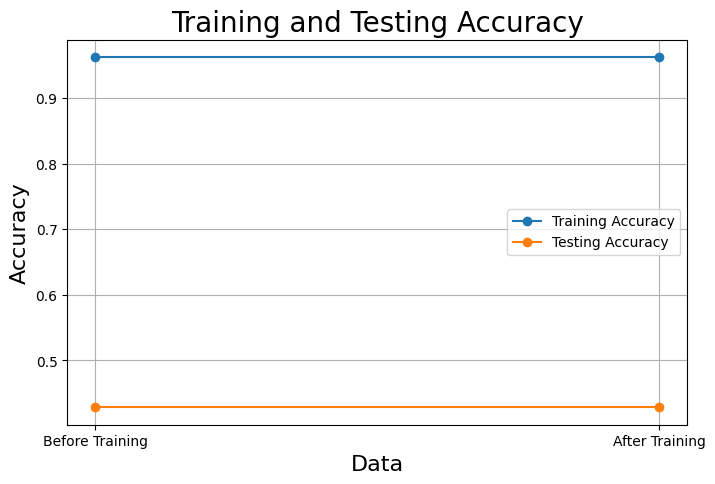

In [30]:
import matplotlib.pyplot as plt

# Predictions on training data
y_train_pred = model.predict(X_train_vec)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on testing data
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [train_accuracy, train_accuracy], label='Training Accuracy', marker='o')
plt.plot([0, 1], [accuracy, accuracy], label='Testing Accuracy', marker='o')
plt.xticks([0, 1], ['Before Training', 'After Training'])
plt.title('Training and Testing Accuracy',fontsize=20)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [26]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
print(report)

report = {label: {metric: report[label][metric] for metric in report[label]} for label in report if isinstance(report[label], dict)}

labels = list(report.keys())
evaluation_metrics = ['precision', 'recall', 'f1-score']
metric_scores = {metric: [report[label][metric] for label in labels if label in report] for metric in evaluation_metrics}

fig = go.Figure()
for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=labels, y=metric_scores[metric]))

fig.update_layout(title='Intent Prediction Model Performance',title_font=dict(size=28),
                  xaxis=dict(title='Intent',title_font=dict(size=24)),
                  yaxis=dict(title='Score',title_font=dict(size=24)),
                  barmode='group')

fig.show()

{'about': {'precision': 0.14285714285714285, 'recall': 1.0, 'f1-score': 0.25, 'support': 1}, 'about-creator': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'about-tasks': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'anxiety-appearance': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, 'anxiety-attack': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'anxiety-crowds': {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}, 'anxiety-death': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'anxiety-general': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'anxiety-judged': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'anxiety-uncertainity': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'anxiety-work': {'precision': 0.029850746268656716, 'recall': 1.0, 'f1

In [14]:
def predict_intent(user_input):
    user_input_vec = vectorizer.transform([user_input])

    intent = model.predict(user_input_vec)[0]

    return intent

def generate_response(intent):
    if intent in df['tags'].values:
        responses_list = df[df['tags'] == intent]['responses'].iloc[0]
        response = random.choice(responses_list)
    else:
        response = "I'm here to help. Please let me know how I can assist you."

    return response

while True:
    user_input = input("User: ")

    intent = predict_intent(user_input)
    print(intent)
    response = generate_response(intent)

    print("Chatbot:", response)


KeyboardInterrupt: Interrupted by user

In [ ]:
# import numpy as np
# import plotly.graph_objects as go
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Filter out classes with zero values
# non_zero_classes = {label: report[label] for label in report if isinstance(report[label], dict)}

# # Calculate overall precision, recall, and F1-score with zero division handling
# overall_precision = precision_score(y_test, y_pred, labels=list(non_zero_classes.keys()), average='macro', zero_division=0)
# overall_recall = recall_score(y_test, y_pred, labels=list(non_zero_classes.keys()), average='macro', zero_division=0)
# overall_f1_score = f1_score(y_test, y_pred, labels=list(non_zero_classes.keys()), average='macro', zero_division=0)

# print("Overall Precision:", overall_precision)
# print("Overall Recall:", overall_recall)
# print("Overall F1-score:", overall_f1_score)

# # # Plot the overall precision, recall, and F1-score
# # metrics = ['Precision', 'Recall', 'F1-score']
# # scores = [overall_precision, overall_recall, overall_f1_score]

# # fig = go.Figure(go.Bar(x=metrics, y=scores, marker_color=['blue', 'green', 'red']))
# # fig.update_layout(title='Overall Intent Prediction Model Performance',
# #                   xaxis_title='Metric',
# #                   yaxis_title='Score',
# #                   height=400,width=700)
# # fig.show()

In [ ]:
# from sklearn.metrics import confusion_matrix, f1_score
# import numpy as np

# # Assuming y_test and y_pred are your actual and predicted labels respectively
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Calculate the general F1 score
# general_f1 = f1_score(y_test, y_pred, average='weighted')

# print("Confusion Matrix:")
# print(conf_matrix)
# print("General F1 Score:", general_f1)
